In [1]:
from lmfit import Model
from scipy.stats import kstest
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shutil
import os
import glob

In [14]:
def function(x, A, B):
    fun = []
    for i in x:
        fun.append(A + B/((i-1.5)**2+1))
    return fun

In [15]:
def bell_curve(x, mu, sigma):
    return 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((x - mu) / sigma)**2)

def rotated_bell_curve(x, mu, sigma, C):
    return -bell_curve(x, mu, sigma) + C

In [4]:
N = [5000, 10000]
dim = [1,2,3,4]

alpha_a = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]
alpha_g = [0.1, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]

for n in N:
    for d in dim:
        path_cluber = f"../../../data_cleber/N_{n}/dim_{d}/"
        path_original = f"../../data/N_{n}/dim_{d}/"

        if not os.path.exists(path_cluber):
            os.makedirs(path_cluber)
        else:
            pass

        # Copy all alpha_a_fixed
        for alpha in alpha_a:
            shutil.copy(path_original + f"properties_all_alpha_a_{alpha}.txt",path_cluber + f"properties_all_alpha_a_{alpha}.txt")
        
        # Copy all alpha_g_fixed
        for alphaG in alpha_g:
            shutil.copy(path_original + f"properties_all_alpha_g_{alphaG}.txt",path_cluber + f"properties_all_alpha_g_{alphaG}.txt")

In [16]:
list_a, list_b = [], []
list_x, list_y = [], []

dim = [1,2,3,4]
for i in dim:
    prop = pd.read_csv(f"../../data/N_100000/dim_{i}/properties_all_alpha_g_2.0.txt",sep=" ")
    x0 = prop["#alpha_a"][prop["#short_mean"].idxmin()]
    x_values = prop["#alpha_a"].values
    y_values = prop["#short_mean"].values
    print(f"x_min = {x0}, L_min = {min(y_values)}, dim = {i}")
    list_x.append(x_values)
    list_y.append(y_values)
    
    # Create a model using the custom q-exponential function
    model = Model(function)
    #model = Model(rotated_bell_curve)
    A_parameter, B_parameter =  1, 2
    #mu_parameter, sigma_parameter =  .1, 1.1
    params = model.make_params(A=A_parameter, B=B_parameter)
    #params = model.make_params(mu=mu_parameter, sigma=sigma_parameter)
    # Set initial parameter values

    
    result = model.fit(y_values, params, x=x_values)
    # Get the fitted parameters
    fitted_A = result.params['A'].value
    fitted_B = result.params['B'].value
    # fitted_A = result.params['mu'].value
    # fitted_B = result.params['sigma'].value
    list_a.append(fitted_A)
    list_b.append(fitted_B)
parms = [(i,j) for i,j in zip(list_a,list_b)]
my_data = [(i,j) for i,j in zip(list_x, list_y)]

x_min = 0.0, L_min = 11.52682984496124, dim = 1
x_min = 0.6, L_min = 11.45824090909091, dim = 2
x_min = 0.9, L_min = 11.244940909090912, dim = 3
x_min = 1.5, L_min = 11.076922331838569, dim = 4


In [17]:
list_a, list_b, list_c = [], [], []
list_x, list_y = [], []

dim = [1,2,3,4]
for i in dim:
    prop = pd.read_csv(f"../../data/N_100000/dim_{i}/properties_all_alpha_g_2.0.txt",sep=" ")
    x0 = prop["#alpha_a"][prop["#short_mean"].idxmin()]
    x_values = prop["#alpha_a"].values
    y_values = prop["#short_mean"].values
    print(f"x_min = {x0}, L_min = {min(y_values)}, dim = {i}")
    list_x.append(x_values)
    list_y.append(y_values)
    
    # Create a model using the custom q-exponential function
    model = Model(rotated_bell_curve)
    mu_parameter, sigma_parameter, C_parameter =  .1, 1.1, 30
    
    params = model.make_params(mu=mu_parameter, sigma=sigma_parameter, C = C_parameter)
    # Set initial parameter values    
    result = model.fit(y_values, params, x=x_values)
    # Get the fitted parameters
    fitted_A = result.params['mu'].value
    fitted_B = result.params['sigma'].value
    fitted_C = result.params['C'].value
    
    list_a.append(fitted_A)
    list_b.append(fitted_B)
    list_c.append(fitted_C)
parms = [(i,j,k) for i,j,k in zip(list_a, list_b, list_c)]
my_data = [(i,j) for i,j in zip(list_x, list_y)]

x_min = 0.0, L_min = 11.52682984496124, dim = 1
x_min = 0.6, L_min = 11.45824090909091, dim = 2
x_min = 0.9, L_min = 11.244940909090912, dim = 3
x_min = 1.5, L_min = 11.076922331838569, dim = 4


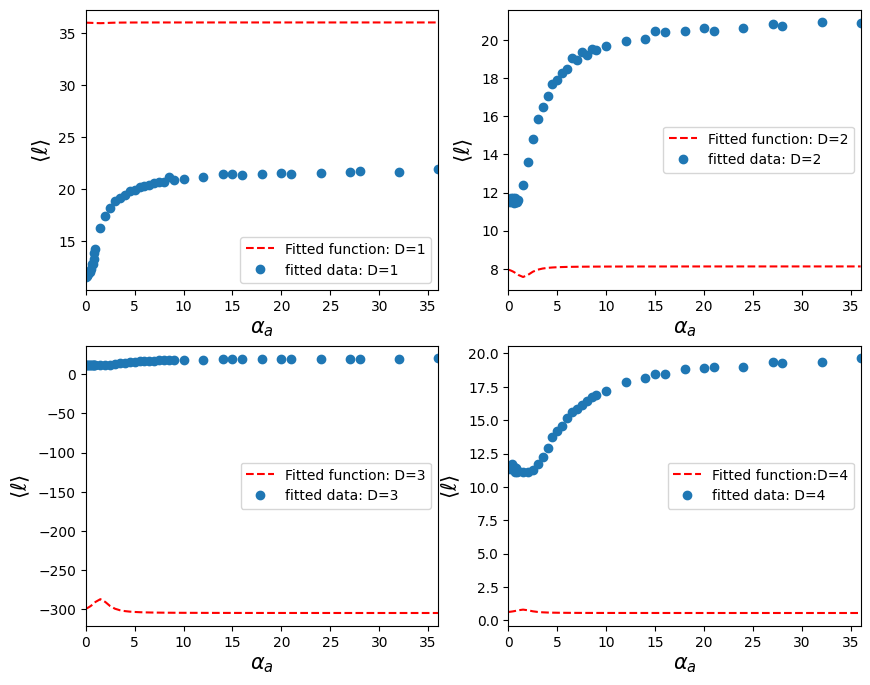

In [18]:
fig, axs = plt.subplots(2,2,figsize=(10,8))

axs[0, 0].plot(my_data[0][0], function(my_data[0][0], parms[0][0], parms[0][1]), 'r--', label='Fitted function: D=1')
axs[0, 0].plot(my_data[0][0], my_data[0][1], "o", label='fitted data: D=1')

axs[0, 1].plot(my_data[1][0], function(my_data[1][0], parms[1][0], parms[1][1]), 'r--', label='Fitted function: D=2')
axs[0, 1].plot(my_data[1][0], my_data[1][1], "o", label='fitted data: D=2')

axs[1, 0].plot(my_data[2][0], function(my_data[2][0], parms[2][0], parms[2][1]), 'r--', label='Fitted function: D=3')
axs[1, 0].plot(my_data[2][0], my_data[2][1], "o", label='fitted data: D=3')

axs[1, 1].plot(my_data[3][0], function(my_data[3][0], parms[3][0], parms[3][1]), 'r--', label='Fitted function:D=4')
axs[1, 1].plot(my_data[3][0], my_data[3][1], "o", label='fitted data: D=4')

for ax in axs.flat:
    ax.set_xlabel(r'$\alpha_a$', fontsize=15)
    ax.set_ylabel(r'$\langle \ell \rangle$', fontsize=15)
    ax.set_xlim([0,36])
    ax.legend()

#plt.legend()
plt.show()

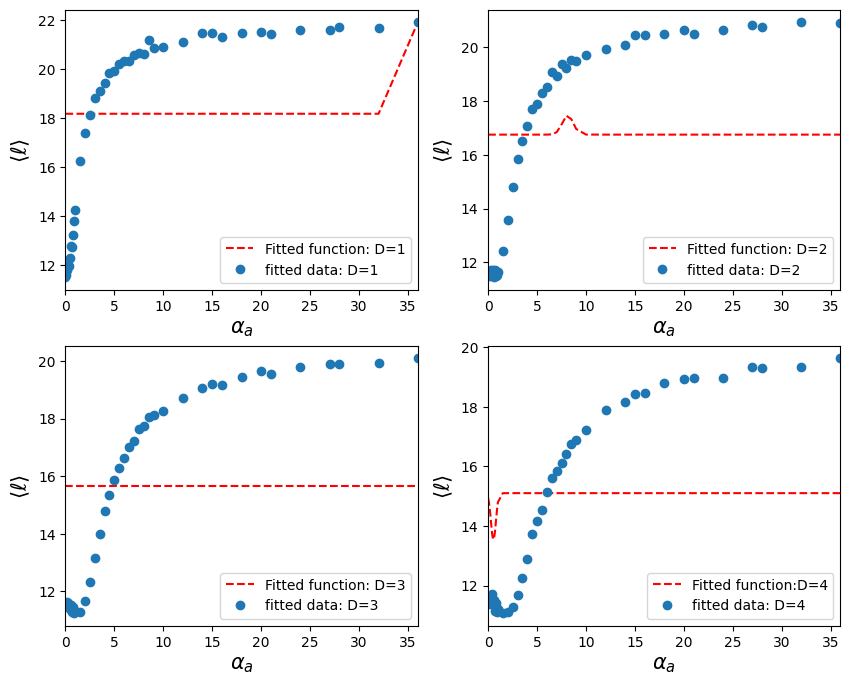

In [19]:
fig, axs = plt.subplots(2,2,figsize=(10,8))

axs[0, 0].plot(my_data[0][0], rotated_bell_curve(my_data[0][0], parms[0][0], parms[0][1], parms[0][2]), 'r--', label='Fitted function: D=1')
axs[0, 0].plot(my_data[0][0], my_data[0][1], "o", label='fitted data: D=1')

axs[0, 1].plot(my_data[1][0], rotated_bell_curve(my_data[1][0], parms[1][0], parms[1][1], parms[1][2]), 'r--', label='Fitted function: D=2')
axs[0, 1].plot(my_data[1][0], my_data[1][1], "o", label='fitted data: D=2')

axs[1, 0].plot(my_data[2][0], rotated_bell_curve(my_data[2][0], parms[2][0], parms[2][1], parms[2][2]), 'r--', label='Fitted function: D=3')
axs[1, 0].plot(my_data[2][0], my_data[2][1], "o", label='fitted data: D=3')

axs[1, 1].plot(my_data[3][0], rotated_bell_curve(my_data[3][0], parms[3][0], parms[3][1], parms[3][2]), 'r--', label='Fitted function:D=4')
axs[1, 1].plot(my_data[3][0], my_data[3][1], "o", label='fitted data: D=4')

for ax in axs.flat:
    ax.set_xlabel(r'$\alpha_a$', fontsize=15)
    ax.set_ylabel(r'$\langle \ell \rangle$', fontsize=15)
    ax.set_xlim([0,36])
    ax.legend()

#plt.legend()
plt.show()

In [20]:
data_1 = {"short":my_data[0][1],"alpha_a":my_data[0][0]}
data_2 = {"short":my_data[1][1],"alpha_a":my_data[1][0]}
data_3 = {"short":my_data[2][1],"alpha_a":my_data[2][0]}
data_4 = {"short":my_data[3][1],"alpha_a":my_data[3][0]}

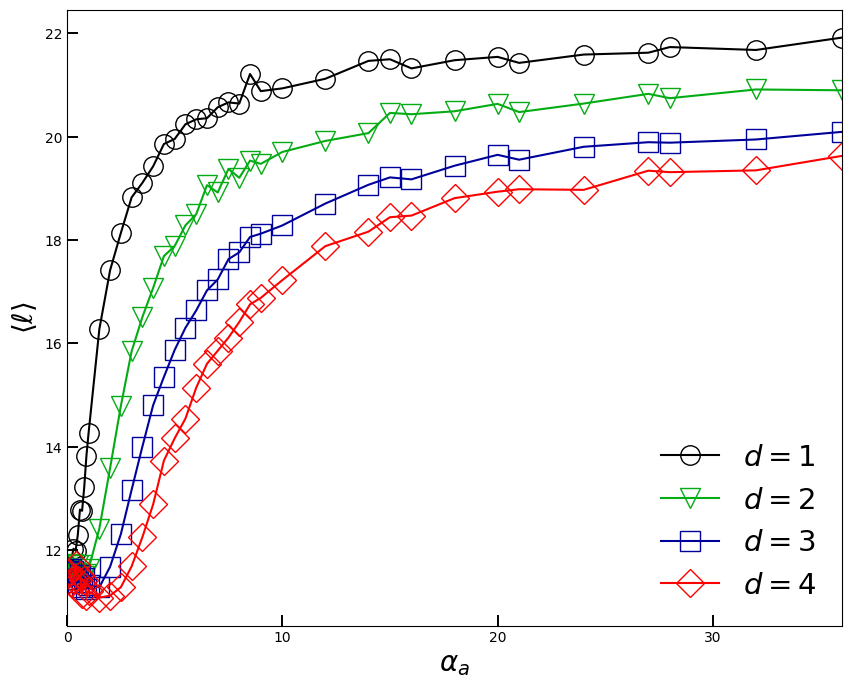

In [21]:
plt.figure(figsize=(10,8))
labels = [fr"$d = {i} $" for i in range(1,5)]
colors = ["black", "#03AC13", "#00019a", "#fe0000"]
markers = ['o', 'v', 's', 'D']
markersize = 14
# Iterate over each dataset and plot with different color and linestyle
for i, (data, label) in enumerate(zip([data_1, data_2, data_3, data_4], labels)):
    plt.plot(data["alpha_a"], data["short"], linestyle='-', color=colors[i],
                marker=markers[i], markeredgecolor=colors[i], label=label,
                markersize=markersize, markerfacecolor='none')
plt.legend(prop={"size":21}, fancybox=True, framealpha=0.0)

# Set major and minor ticks
plt.locator_params(axis='x', nbins=6)
plt.locator_params(axis='y', nbins=10)

# Set tick label format
#plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda val, pos: '{:.1f}'.format(val)))


# Set tick parameters
plt.tick_params(axis='x', direction="in", length=8, width=1.4)
plt.tick_params(axis='y', direction='in', length=8, width=1.4)

plt.ylabel(r"$\langle \ell \rangle$", fontsize=20)
plt.xlabel(r"$\alpha_a$", fontsize=20)
plt.xlim([0,36])
plt.show()

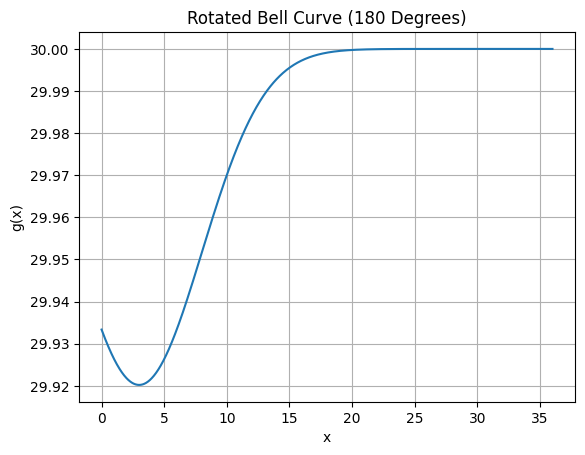

In [22]:
import numpy as np
import matplotlib.pyplot as plt

def bell_curve(x, mu, sigma):
    return 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((x - mu) / sigma)**2)

def rotated_bell_curve(x, mu, sigma):
    return -bell_curve(x, mu, sigma) + 30

# Generate some x values
x = np.linspace(0, 36, 1000)

# Set the parameters for the bell curve
mu = 3  # Mean
sigma = 5  # Standard deviation

# Calculate the y values using the rotated bell curve function
y_rotated = rotated_bell_curve(x, mu, sigma)

# Plot the rotated bell curve
plt.plot(x, y_rotated)
plt.title('Rotated Bell Curve (180 Degrees)')
plt.xlabel('x')
plt.ylabel('g(x)')
plt.grid(True)
plt.show()
